<a href="https://colab.research.google.com/github/vanessafeldmann86-alt/Aerobic-mesophilic-spore-forming-bacteria/blob/main/AMS_AMRS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOD (CFU/g): 1
LOD (log10 CFU/g): 0.0

Número de ND (<LOD):
Totais: 3
Rope: 6

=== Shapiro-Wilk por grupo: log_totais ===
polvilho doce      | W=0.9748 | p=0.6775
polvilho azedo     | W=0.9582 | p=0.2781
fecula de mandioca | W=0.9576 | p=0.2679

=== Shapiro-Wilk por grupo: log_rope ===
polvilho doce      | W=0.9482 | p=0.1515
polvilho azedo     | W=0.9250 | p=0.0361
fecula de mandioca | W=0.9594 | p=0.2984

=== Levene (center=median): log_totais ===
Stat=2.3805 | p=0.0985

=== Levene (center=median): log_rope ===
Stat=1.3805 | p=0.2569

=== ANOVA clássica: log_totais ===
                     sum_sq    df        F    PR(>F)
C(materia_prima)  17.344087   2.0  9.70354  0.000157
Residual          77.751803  87.0      NaN       NaN

Shapiro resíduos: W=0.9860 | p=0.4484

=== ANOVA clássica: log_rope ===
                     sum_sq    df          F    PR(>F)
C(materia_prima)  20.713727   2.0  10.727277  0.000069
Residual          83.995883  87.0        NaN       NaN

Shapiro resíduos: W=0.98

<Figure size 800x500 with 0 Axes>

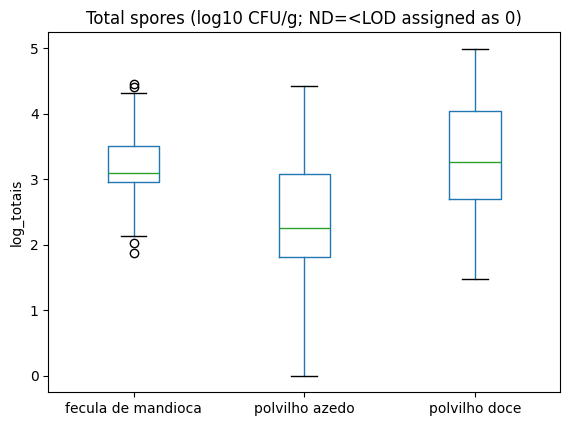

<Figure size 800x500 with 0 Axes>

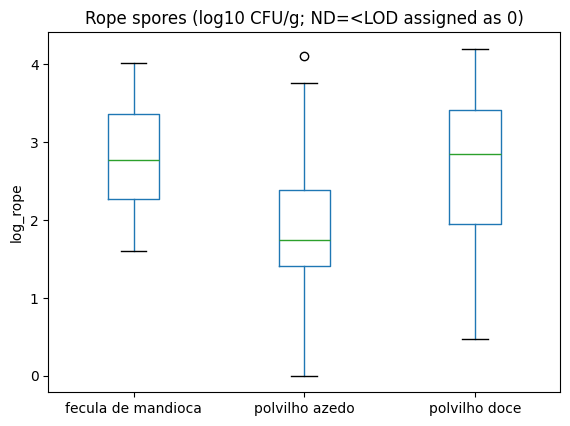

=== Esporos Totais (log10 CFU/g) ===


,materia_prima,n,media±dp,mediana[IQR],ND(<LOD),Tukey
0,fecula de mandioca,30,3.17 ± 0.70,3.10 [2.95-3.51],0,a
1,polvilho azedo,30,2.30 ± 1.12,2.25 [1.81-3.08],3,b
2,polvilho doce,30,3.28 ± 0.97,3.26 [2.69-4.04],0,a



=== Esporos Rope (log10 CFU/g) ===


,materia_prima,n,media±dp,mediana[IQR],ND(<LOD),Tukey
0,fecula de mandioca,30,2.79 ± 0.73,2.78 [2.27-3.35],0,a
1,polvilho azedo,30,1.74 ± 1.11,1.75 [1.40-2.38],6,b
2,polvilho doce,30,2.71 ± 1.06,2.85 [1.96-3.41],0,a


  sample    AMS_range    AMS_median_IQR   AMRS_range   AMRS_median_IQR
0     CS  1.87 – 4.45  3.10 [2.95–3.51]  1.60 – 4.01  2.78 [2.27–3.35]
1    SCS  0.00 – 4.42  2.25 [1.81–3.08]  0.00 – 4.10  1.75 [1.40–2.38]
2    SWS  1.48 – 4.99  3.26 [2.69–4.04]  0.48 – 4.20  2.85 [1.96–3.41]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import shapiro, levene, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.oneway import anova_oneway

# =========================
# 1) DATAFRAME (SEUS DADOS)
# =========================
df = pd.DataFrame({
    'materia_prima': ['polvilho doce'] * 30 + ['polvilho azedo'] * 30 + ['fecula de mandioca'] * 30,
    'log_totais': [
        # Polvilho doce
        2.69, 4.99, 3.79, 3.14, 4.09, 1.65, 3.26, 1.82, 3.26, 4.14, 4.25, 2.75, 1.48, 2.21, 4.48, 3.31, 4.55, 3.52, 2.96, 4.36, 2.99, 2.69, 4.98, 1.98, 3.60, 1.99, 3.88, 3.74, 2.65, 3.10,
        # Polvilho azedo
        3.25, 3.65, 2.89, 1.95, 4.21, 3.13, 1.19, 1.78, 2.69, 2.81, 0, 2.25, 2.2, 1.91, 1.6, 2.16, 3.41, 0, 2.26, 2.92, 0, 3.3, 4.42, 3.15, 2.05, 2.51, 1, 2.5, 1.93, 1.76,
        # Fécula de mandioca
        2.38, 3.47, 3.81, 3.71, 4.41, 2.15, 4.22, 2.02, 3.34, 3.1, 2.96, 3.1, 3.25, 3.42, 2.95, 2.95, 3.04, 3.49, 2.95, 3.35, 2.82, 4.45, 2.14, 1.87, 4.31, 2.17, 3.71, 3.52, 3.04, 2.95
    ],
    'log_rope': [
        # Polvilho doce
        2.0, 4.2, 2.81, 3.11, 0.6, 3.37, 3.21, 1.11, 2.89, 3.84, 4.11, 1.2, 1.46, 0.48, 3.91, 2.4, 4.05, 3.25, 2.7, 3.14, 2.63, 2.72, 4.1, 1.63, 3.57, 1.71, 3.42, 2.39, 1.94, 3.29,
        # Polvilho azedo
        2.46, 1.58, 1.86, 1.34, 4.1, 2.13, 0, 1.51, 1.82, 2.81, 0, 2.57, 1.58, 1.38, 0, 1.69, 3.37, 0, 2.15, 2.55, 0, 2.87, 3.76, 2, 1.65, 1.75, 0, 1.75, 1.91, 1.48,
        # Fécula de mandioca
        2.23, 2.56, 2.37, 3.58, 3.96, 1.6, 3.96, 2.06, 3.28, 2.6, 2.7, 3.18, 3.38, 2.85, 1.88, 2.08, 2.49, 2.9, 2.5, 3.12, 2.54, 4.01, 1.68, 1.69, 3.88, 1.78, 3.50, 3.41, 3.06, 2.97
    ]
})

# =========================
# 2) DEFININDO LOD
# =========================
# Como você plaqueou 10 mL do homogenato 10^-1,
# o LOD provável é 1 UFC/g -> log10(1)=0.
LOD_CFU_G = 1
LOD_LOG10 = np.log10(LOD_CFU_G)

print("LOD (CFU/g):", LOD_CFU_G)
print("LOD (log10 CFU/g):", LOD_LOG10)

# Aqui os zeros já são exatamente log10(LOD)=0
# Então NÃO precisa alterar o dataframe.
# Só precisamos DOCUMENTAR que 0 = <LOD.
df["ND_totais"] = (df["log_totais"] == 0)
df["ND_rope"] = (df["log_rope"] == 0)

print("\nNúmero de ND (<LOD):")
print("Totais:", df["ND_totais"].sum())
print("Rope:", df["ND_rope"].sum())


# =========================
# 3) SHAPIRO POR GRUPO
# =========================
def shapiro_por_grupo(df, coluna):
    print(f"\n=== Shapiro-Wilk por grupo: {coluna} ===")
    for g in df["materia_prima"].unique():
        dados = df[df["materia_prima"] == g][coluna]
        stat, p = shapiro(dados)
        print(f"{g:18s} | W={stat:.4f} | p={p:.4f}")

shapiro_por_grupo(df, "log_totais")
shapiro_por_grupo(df, "log_rope")


# =========================
# 4) LEVENE (homogeneidade)
# =========================
def levene_test(df, coluna):
    grupos = [df[df["materia_prima"] == g][coluna] for g in df["materia_prima"].unique()]
    stat, p = levene(*grupos, center='median')
    print(f"\n=== Levene (center=median): {coluna} ===")
    print(f"Stat={stat:.4f} | p={p:.4f}")

levene_test(df, "log_totais")
levene_test(df, "log_rope")


# =========================
# 5) ANOVA CLÁSSICA + RESÍDUOS
# =========================
def anova_classica(df, coluna):
    print(f"\n=== ANOVA clássica: {coluna} ===")
    model = ols(f"{coluna} ~ C(materia_prima)", data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Normalidade dos resíduos (mais importante que Shapiro por grupo)
    residuos = model.resid
    stat, p = shapiro(residuos)
    print(f"\nShapiro resíduos: W={stat:.4f} | p={p:.4f}")

    return model

model_totais = anova_classica(df, "log_totais")
model_rope = anova_classica(df, "log_rope")


# =========================
# 6) TUKEY HSD (pós-teste ANOVA)
# =========================
def tukey(df, coluna):
    print(f"\n=== Tukey HSD: {coluna} ===")
    res = pairwise_tukeyhsd(endog=df[coluna], groups=df["materia_prima"], alpha=0.05)
    print(res)

tukey(df, "log_totais")
tukey(df, "log_rope")


# =========================
# 7) WELCH ANOVA (ROBUSTO)
# =========================
def welch_anova(df, coluna):
    print(f"\n=== Welch ANOVA: {coluna} ===")
    grupos = [df[df["materia_prima"] == g][coluna].values for g in df["materia_prima"].unique()]
    res = anova_oneway(grupos, use_var="unequal")  # Welch
    print(res)

welch_anova(df, "log_totais")
welch_anova(df, "log_rope")


# =========================
# 8) KRUSKAL (CHECK ROBUSTEZ)
# =========================
def kruskal_test(df, coluna):
    print(f"\n=== Kruskal-Wallis: {coluna} ===")
    grupos = [df[df["materia_prima"] == g][coluna] for g in df["materia_prima"].unique()]
    stat, p = kruskal(*grupos)
    print(f"H={stat:.4f} | p={p:.6f}")

kruskal_test(df, "log_totais")
kruskal_test(df, "log_rope")


# =========================
# 9) BOXPLOTS
# =========================
def boxplot(df, coluna, titulo):
    plt.figure(figsize=(8, 5))
    df.boxplot(column=coluna, by="materia_prima", grid=False)
    plt.title(titulo)
    plt.suptitle("")
    plt.xlabel("")
    plt.ylabel(coluna)
    plt.show()

boxplot(df, "log_totais", "Total spores (log10 CFU/g; ND=<LOD assigned as 0)")
boxplot(df, "log_rope", "Rope spores (log10 CFU/g; ND=<LOD assigned as 0)")

# ============================================================
# Bibliotecas
# ============================================================
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from string import ascii_lowercase

# ============================================================
# 1) Adiciona colunas de ND (<LOD) a partir dos dados originais
# ============================================================
# Supondo que 'log_totais' e 'log_rope' sejam log10(CFU/g)
# E que 0 representa ND (<LOD)
df['ND_totais'] = df['log_totais'].apply(lambda x: 1 if x == 0 else 0)
df['ND_rope']   = df['log_rope'].apply(lambda x: 1 if x == 0 else 0)

# ============================================================
# 2) Função para criar tabela resumo
# ============================================================
def tabela_resumo_completo(df, coluna, nd_col):
    resumo = df.groupby("materia_prima")[coluna].agg(
        n="count",
        media="mean",
        dp="std",
        mediana="median",
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    ).reset_index()

    resumo["media±dp"] = resumo.apply(lambda r: f"{r['media']:.2f} ± {r['dp']:.2f}", axis=1)
    resumo["mediana[IQR]"] = resumo.apply(lambda r: f"{r['mediana']:.2f} [{r['q1']:.2f}-{r['q3']:.2f}]", axis=1)

    # ND (<LOD)
    nd = df.groupby("materia_prima")[nd_col].sum().reset_index()
    nd.rename(columns={nd_col: "ND(<LOD)"}, inplace=True)
    resumo = pd.merge(resumo, nd, on="materia_prima")

    return resumo

# ============================================================
# 3) Função para gerar letras do Tukey HSD (Corrigida)
# ============================================================
def tukey_letras(df, coluna):
    tukey_res = pairwise_tukeyhsd(endog=df[coluna], groups=df["materia_prima"], alpha=0.05)
    results_df = pd.DataFrame(data=tukey_res._results_table.data[1:], columns=tukey_res._results_table.data[0])

    group_means = df.groupby("materia_prima")[coluna].mean()
    sorted_groups = group_means.sort_values(ascending=False).index.tolist()

    assigned_letters = {group: set() for group in sorted_groups}

    # Store comparisons in an easy-to-lookup dictionary
    # Key: frozenset of two groups, Value: True if significantly different, False otherwise
    comparisons = {}
    for _, row in results_df.iterrows():
        g1, g2, reject = row['group1'], row['group2'], row['reject']
        comparisons[frozenset({g1, g2})] = reject

    letter_groups = [] # Each element will be a list of groups assigned a specific letter

    # Iterate through the sorted groups
    for current_group in sorted_groups:

        assigned_to_existing_letter = False

        for letter_group_idx, group_list_in_letter_group in enumerate(letter_groups):
            can_assign_current_letter = True

            # Check if current_group is significantly different from any group already in this letter_group
            for member_group in group_list_in_letter_group:
                key = frozenset({current_group, member_group})
                # If they are significantly different, this group cannot join this letter_group
                if key in comparisons and comparisons[key]: # comparisons[key] is True if different
                    can_assign_current_letter = False
                    break

            if can_assign_current_letter:
                # If not significantly different from any group in this letter_group, assign the letter
                assigned_letters[current_group].add(ascii_lowercase[letter_group_idx])
                group_list_in_letter_group.append(current_group) # Add group to this letter_group
                assigned_to_existing_letter = True
                break # Move to the next sorted group

        # If the group couldn't be assigned to any existing letter group, create a new one
        if not assigned_to_existing_letter:
            new_letter_char = ascii_lowercase[len(letter_groups)]
            assigned_letters[current_group].add(new_letter_char)
            letter_groups.append([current_group]) # Start a new letter_group with this group

    final_letters = {group: ''.join(sorted(list(letters_set))) for group, letters_set in assigned_letters.items()}
    return final_letters

# ============================================================
# 4) Gerar tabela final com letras do Tukey
# ============================================================
def tabela_final(df, coluna, nd_col):
    resumo = tabela_resumo_completo(df, coluna, nd_col)
    letras = tukey_letras(df, coluna)
    resumo["Tukey"] = resumo["materia_prima"].map(letras)
    return resumo[["materia_prima","n","media±dp","mediana[IQR]","ND(<LOD)","Tukey"]]

# ============================================================
# 5) Tabelas para Totais e Rope
# ============================================================
tabela_totais = tabela_final(df, "log_totais", "ND_totais")
tabela_rope   = tabela_final(df, "log_rope", "ND_rope")

# Exibir tabelas
print("=== Esporos Totais (log10 CFU/g) ===")
display(tabela_totais)
print("\n=== Esporos Rope (log10 CFU/g) ===")
display(tabela_rope)

# Dados (renomeado para evitar conflito com 'df' acima)
df_other_data = pd.DataFrame({
    'sample': ['CS']*30 + ['SWS']*30 + ['SCS']*30,
    'AMS': [
        # CS
        2.38, 3.47, 3.81, 3.71, 4.41, 2.15, 4.22, 2.02, 3.34, 3.10, 2.96, 3.10, 3.25, 3.42, 2.95, 2.95, 3.04, 3.49, 2.95, 3.35, 2.82, 4.45, 2.14, 1.87, 4.31, 2.17, 3.71, 3.52, 3.04, 2.95,
        # SWS
        2.69, 4.99, 3.79, 3.14, 4.09, 1.65, 3.26, 1.82, 3.26, 4.14, 4.25, 2.75, 1.48, 2.21, 4.48, 3.31, 4.55, 3.52, 2.96, 4.36, 2.99, 2.69, 4.98, 1.98, 3.60, 1.99, 3.88, 3.74, 2.65, 3.10,
        # SCS
        3.25, 3.65, 2.89, 1.95, 4.21, 3.13, 1.19, 1.78, 2.69, 2.81, 0, 2.25, 2.2, 1.91, 1.6, 2.16, 3.41, 0, 2.26, 2.92, 0, 3.3, 4.42, 3.15, 2.05, 2.51, 1, 2.5, 1.93, 1.76
    ],
    'AMRS': [
        # CS
        2.23, 2.56, 2.37, 3.58, 3.96, 1.6, 3.96, 2.06, 3.28, 2.6, 2.7, 3.18, 3.38, 2.85, 1.88, 2.08, 2.49, 2.9, 2.5, 3.12, 2.54, 4.01, 1.68, 1.69, 3.88, 1.78, 3.50, 3.41, 3.06, 2.97,
        # SWS
        2.0, 4.2,2.81, 3.11, 0.6, 3.37, 3.21, 1.11, 2.89, 3.84, 4.11, 1.2, 1.46, 0.48, 3.91, 2.4, 4.05, 3.25, 2.7, 3.14, 2.63, 2.72, 4.1, 1.63, 3.57, 1.71, 3.42, 2.39, 1.94, 3.29,
        # SCS
        2.46, 1.58, 1.86, 1.34, 4.1, 2.13, 0, 1.51, 1.82, 2.81, 0, 2.57, 1.58, 1.38, 0, 1.69, 3.37, 0, 2.15, 2.55, 0, 2.87, 3.76, 2, 1.65, 1.75, 0, 1.75, 1.91, 1.48
    ]
})

# Função para calcular mediana e IQR
def median_iqr(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    median = np.median(x)
    return f"{median:.2f} [{q1:.2f}–{q3:.2f}]"

# Agrupar por tipo de amostra e calcular
summary = df_other_data.groupby('sample').agg(
    AMS_range = ('AMS', lambda x: f"{x.min():.2f} – {x.max():.2f}"),
    AMS_median_IQR = ('AMS', median_iqr),
    AMRS_range = ('AMRS', lambda x: f"{x.min():.2f} – {x.max():.2f}"),
    AMRS_median_IQR = ('AMRS', median_iqr)
).reset_index()

# Exibir tabela
print(summary)

# Nova seção